<a href="https://colab.research.google.com/github/hoangson281205/ueh-ktlt-eco/blob/main/Lib2(2_3_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # chọn file Customer_Behavior.csv bạn vừa tải

import pandas as pd

# Đọc file
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving Customer_Behaviour.csv to Customer_Behaviour.csv


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# 🧠 Bài 2.3.3 – Bài tập thực hành 1
## Xây dựng mô hình Naïve Bayes trên dữ liệu Customer Behavior
---
Mục tiêu: Áp dụng mô hình **Naïve Bayes** để dự đoán hành vi mua hàng của khách hàng.
Theo cấu trúc 2.3.2, ta thực hiện:
1. Import thư viện và nạp dữ liệu.  
2. Tiền xử lý dữ liệu.  
3. Chia dữ liệu train/test.  
4. Huấn luyện mô hình Naïve Bayes.  
5. Đánh giá hiệu quả mô hình.  


Saving Customer_Behaviour.csv to Customer_Behaviour (1).csv
✅ Dữ liệu nạp thành công!


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0



📊 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

🔍 Kiểm tra giá trị thiếu:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

📦 Tập huấn luyện: (320, 4), Tập kiểm tra: (80, 4)

🎯 Accuracy: 0.86

Confusion Matrix:
[[47  4]
 [ 7 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.85      0.76      0.80        29

    accuracy                           0.86        80
   macro avg  

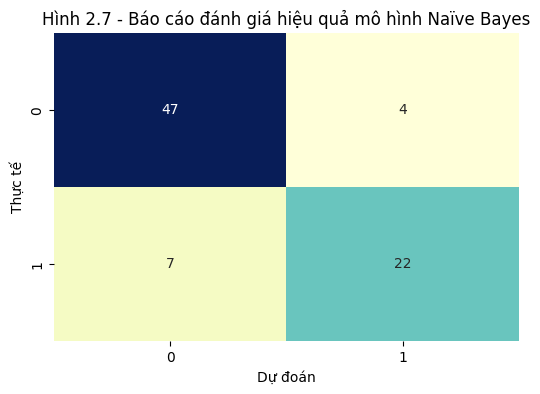

In [2]:
# 1️⃣ Import thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 2️⃣ Tải file dữ liệu
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
print("✅ Dữ liệu nạp thành công!")
display(df.head())

# 3️⃣ Kiểm tra thông tin dữ liệu
print("\n📊 Thông tin dữ liệu:")
df.info()
print("\n🔍 Kiểm tra giá trị thiếu:")
print(df.isnull().sum())

# 4️⃣ Xử lý dữ liệu
# Mã hóa biến phân loại 'Gender' nếu có
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])

# Xác định feature và target
# Giả sử cột 'Purchased' là nhãn
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# 5️⃣ Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\n📦 Tập huấn luyện: {X_train.shape}, Tập kiểm tra: {X_test.shape}")

# 6️⃣ Xây dựng mô hình Naïve Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 7️⃣ Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\n🎯 Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 8️⃣ Vẽ heatmap Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("Hình 2.7 - Báo cáo đánh giá hiệu quả mô hình Naïve Bayes")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()


In [5]:
# === Đánh giá mô hình (chuẩn Hình 2.7 theo PDF) ===
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("=======================================")
print("Hình 2.7 - Báo cáo đánh giá về hiệu quả của mô hình")
print("=======================================\n")
print(f"🎯 Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Hình 2.7 - Báo cáo đánh giá về hiệu quả của mô hình

🎯 Accuracy: 0.86

Confusion Matrix:
[[47  4]
 [ 7 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.85      0.76      0.80        29

    accuracy                           0.86        80
   macro avg       0.86      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

